In [20]:
import numpy as np
from qiskit import QuantumCircuit

Construcción del Circuito

In [21]:
# Creamos un circuito cuantico que actua sobre un registro cuantico de tres qubits
circ = QuantumCircuit(3)

Aplicacion de compuertas logicas

In [22]:
# Aplicamos la compuerta H en el qubit 0, dejando este qubit en superposición 
circ.h(0)

# Aplicamos la compuerta CX (CNOT) con el qubit de control 0 y el qubit target 1
circ.cx(0,1)

# Aplicamos la compuerta CX (CNOT) con el qubit de control 0 y el qubit target 2
circ.cx(0,2)

Visualizacion del circuito

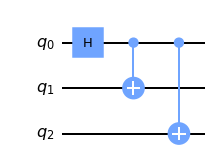

In [23]:
# Visualizacion del circuito
circ.draw('mpl')

Simulacion del circuito

In [7]:
from qiskit.quantum_info import Statevector

# Establecemos el estado inicial del simulador en el estado base usando from_int
state = Statevector.from_int(0, 2**3)

# Evolucionamos el estado a traves del circuito cuantico
state = state.evolve(circ)

# Dibujamos usando latex
state.draw('latex')

<IPython.core.display.Latex object>

In [8]:
from qiskit.visualization import array_to_latex

# Forma alternativa de representarlo en latex
array_to_latex(state)

<IPython.core.display.Latex object>

Operador del circuito

In [9]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Mostramos el resultado
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

Modelo realista

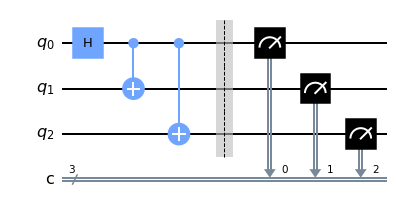

In [10]:
# Creamos un circuito cuantico con medidas
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# Mapeamos las medidas cuanticas en los bits clasicos
meas.measure(range(3), range(3))

# El objeto de circuito Qiskit admite la composición.
# Aquí el meas tiene que ser primero y front=True (ponerlo antes) ya que componer debe 
# poner un circuito más pequeño en uno más grande.
qc = meas.compose(circ, range(3), front=True)

# dibujamos el circuito
qc.draw('mpl')

In [11]:
# Agregamos el transpiler para reducir el circuito a instrucciones QASM soportadas por el 
# backend

from qiskit import transpile

# Usamos AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# Primero tenemos que transpilar el circuito cuantico a las instrucciones QASM de bajo 
# nivel utilizadas por el backend
qc_compiled = transpile(qc, backend)

# Ejecutamos el circuito en el simulador qasm.
# Hemos establecido el numero de repeticiones del circuito en 1024, que es el valor 
# predeterminado
job_sim = backend.run(qc_compiled, shots=1024)

# Tomamos los resultados del trabajo
result_sim = job_sim.result()

Accedemos a las cuentas

In [12]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 522, '111': 502}


Visualizamos las cuentas

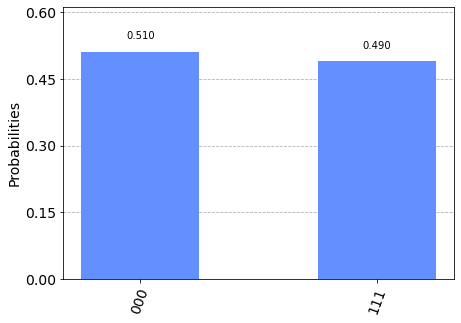

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)